<a href="https://colab.research.google.com/github/jadhav-rakesh/Time_Series_Forecasting/blob/main/arma_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "/content/images6/"

#Autoregressive Moving Average(ARMA)

* ARMA(p, q)
    - p - order of autoregressive process
    - q - order of moving average process

#Forecasting bandwidth usage for data centers

*  Bandwidth is defined as the maximum rate of data that can be transferred
*  Its base unit is bits per second (bps)

##Examining the autoregressive moving average process

* present value is linearly dependent on its own previous values and a constant, just like in an autoregressive process, as well as on the mean of the series, the current error term, and past error terms, like in a moving average process.

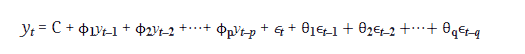

In [3]:
from statsmodels.tsa.arima_process import ArmaProcess

np.random.seed(42)

ar1 = np.array([1, -0.33])
ma1 = np.array([1, 0.9])

ARMA_1_1 = ArmaProcess(ar1, ma1).generate_sample(nsample=1000)

In [4]:
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(ARMA_1_1)

print(f"ADF Statistic: {ADF_result[0]}")
print(f"p-value: {ADF_result[1]}")

ADF Statistic: -6.429878682042695
p-value: 1.707846668009654e-08


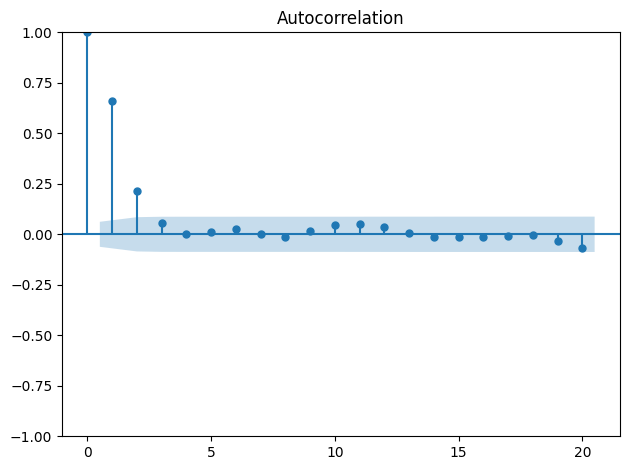

In [5]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ARMA_1_1, lags=20)

plt.tight_layout()

plt.savefig(path+"ts1.png")

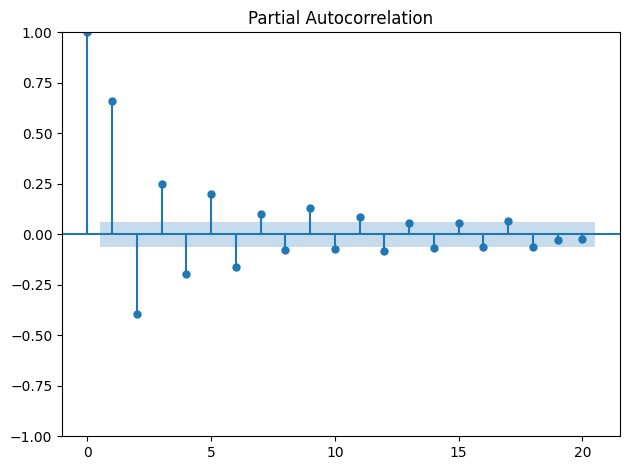

In [6]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(ARMA_1_1, lags=20)

plt.tight_layout()

plt.savefig(path+"ts2.png")

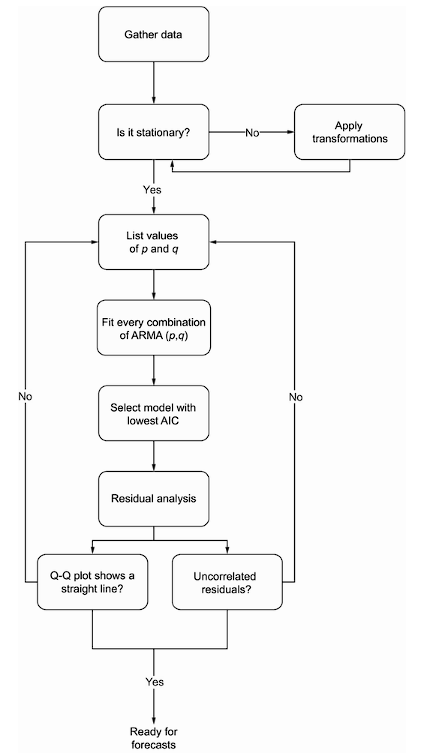

#Akaike information criterion (AIC)

*  AIC quantifies the relative amount of information lost by the model.
* The lower the value of the AIC, the better the model.
*  an overfitting model would have a very good fit, meaning that L̂ is large and AIC decreases. However, the number of parameters k would be large as well, which penalizes the AIC.
* an underfitting model would have a small number of parameters, so k would be small. However, the maximum value of the likelihood function would also be small due to the poor fit, meaning again that the AIC is penalized.
*  AIC quantifies the quality of a model in relation to other models only.

In [7]:
from itertools import product

ps = range(0, 4, 1)
qs = range(0, 4, 1)

order_list = list(product(ps, qs))

print(order_list)

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]


In [8]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_ARMA(endog: Union[pd.Series, list], order_list: list) -> pd.DataFrame:
    results = []

    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(endog, order=(order[0], 0, order[1]), simple_differncing=False).fit(disp=False)
        except:
            continue

        aic = model.aic
        results.append([order, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ["(p,q)", "AIC"]

    result_df = result_df.sort_values(by="AIC", ascending=True).reset_index(drop=True)

    return result_df

In [9]:
result_df = optimize_ARMA(ARMA_1_1, order_list)
result_df

<ipython-input-8-a4886050f208>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['simple_differncing']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,"(p,q)",AIC
0,"(1, 1)",2801.407785
1,"(2, 1)",2802.906070
2,"(1, 2)",2802.967762
3,"(0, 3)",2803.666793
4,"(1, 3)",2804.524027
5,"(3, 1)",2804.588567
6,"(2, 2)",2804.822282
7,"(3, 3)",2806.162939
8,"(2, 3)",2806.175380
9,"(3, 2)",2806.894930


#Residual analysis

* The residuals of a model are simply the difference between the predicted values and the actual values.

##Qualitative Analysis: Q-Q Plot

* quantile-quantile plot (Q-Q plot) - verifying our hypothesis that the model’s residuals are normally distributed.
*  If the distribution of our residuals is similar to a normal distribution, we will see a straight line lying on y = x. This means that our model is a good fit, because the residuals are similar to white noise.
*  if the distribution of our residuals is different from a normal distribution, we will see a curved line. We can then conclude that our model is not a good fit, since the residuals’ distribution is not close to a normal distribution, and therefore the residuals are not similar to white noise.

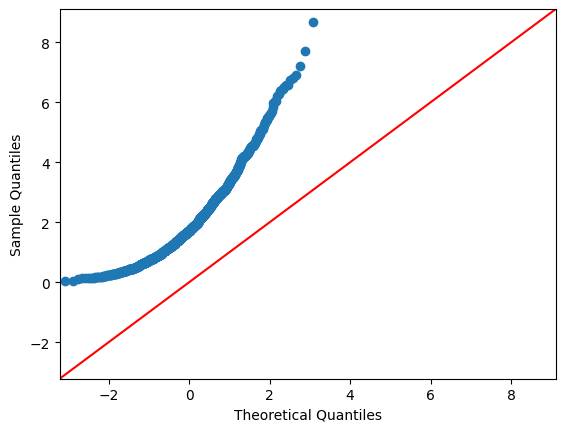

In [10]:
from statsmodels.graphics.gofplots import qqplot

gamma = np.random.default_rng().standard_gamma(shape=2, size=1000)

qqplot(gamma, line="45")

plt.savefig(path+"ts3.png")

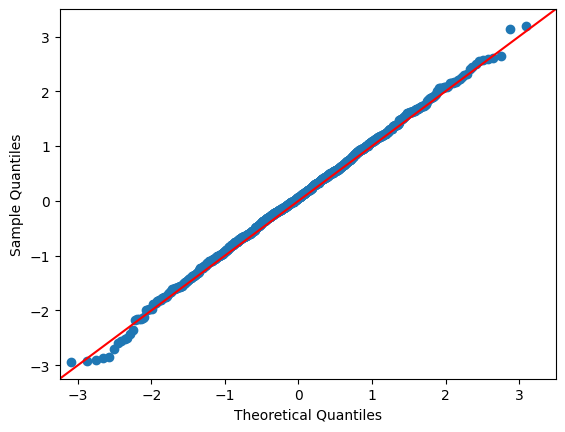

In [11]:
normal = np.random.normal(size=1000)

qqplot(normal, line="45")

plt.savefig(path+"ts4.png")

##Quantitaive Analysis: Ljung-Box Test
* a statistical test that determines whether the autocorrelation of a group of data is significantly different from 0.
* If the p-value is larger than 0.05, we cannot reject the null hypothesis, meaning that the residuals are independently distributed. Therefore, there is no autocorrelation, the residuals are similar to white noise, and the model can be used for forecasting.

##Performing residual analysis

In [12]:
model = SARIMAX(ARMA_1_1, order=(1, 0, 1), simple_differencing=False)
model_fit = model.fit(disp=False)
residuals = model_fit.resid

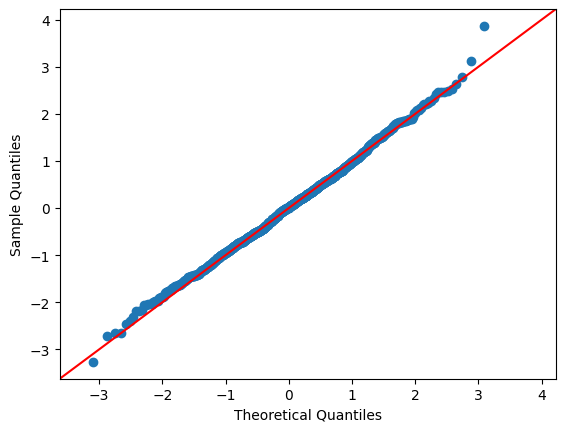

In [13]:
qqplot(residuals, line="45");
plt.savefig(path+"ts5.png")

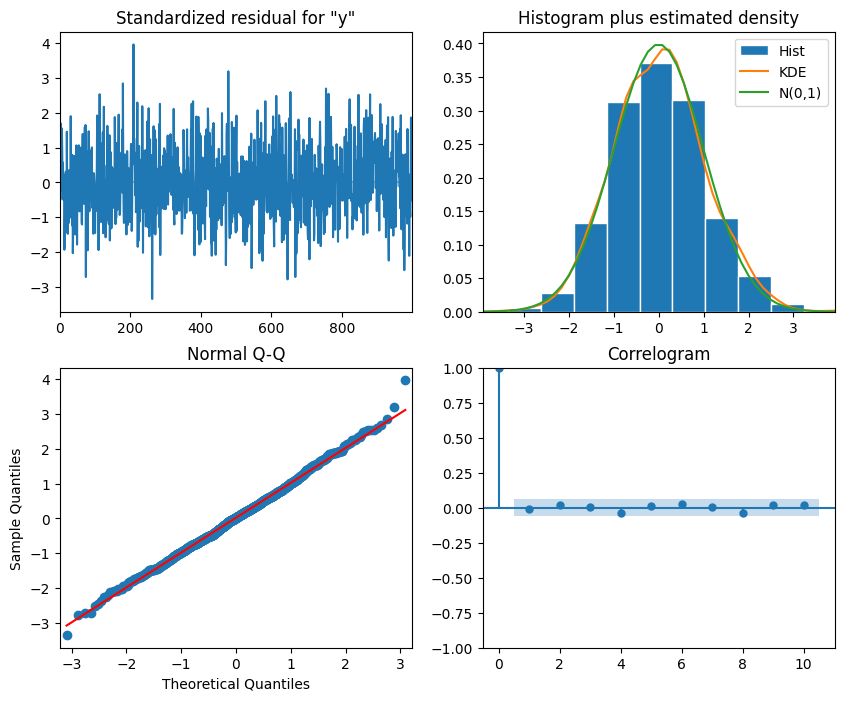

In [14]:
model_fit.plot_diagnostics(figsize=(10,8));
plt.savefig(path+"ts6.png")

In [15]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_df = acorr_ljungbox(residuals, np.arange(1, 11, 1))

print(lb_df)

     lb_stat  lb_pvalue
1   0.030706   0.860897
2   0.528021   0.767966
3   0.540904   0.909817
4   2.079774   0.721089
5   2.271897   0.810385
6   2.896262   0.821750
7   2.900378   0.894063
8   4.418799   0.817501
9   4.787567   0.852419
10  5.246805   0.874093


#Applying the general modeling procedure

In [16]:
df = pd.read_csv("/content/bandwidth.csv")
df

,hourly_bandwidth
0,1000.496714
1,1000.969408
2,1002.046019
3,1004.702118
4,1007.447816
...,...
9995,740.546059
9996,738.906228
9997,736.057995
9998,733.559640


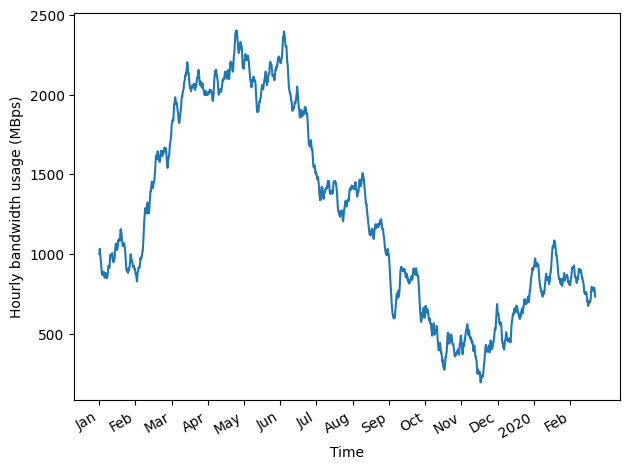

In [17]:
fig, ax = plt.subplots()

ax.plot(df.hourly_bandwidth)
ax.set_xlabel("Time")
ax.set_ylabel("Hourly bandwidth usage (MBps)")

plt.xticks(
    np.arange(0, 10000, 730),
    ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "2020", "Feb"]
)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig(path+"ts7.png")

In [18]:
ADF_result = adfuller(df["hourly_bandwidth"])

print(f"ADF Statistic: {ADF_result[0]}")
print(f"p-value: {ADF_result[1]}")

ADF Statistic: -0.8714653199452735
p-value: 0.7972240255014551


In [19]:
bandwidth_diff = np.diff(df.hourly_bandwidth, n=1)

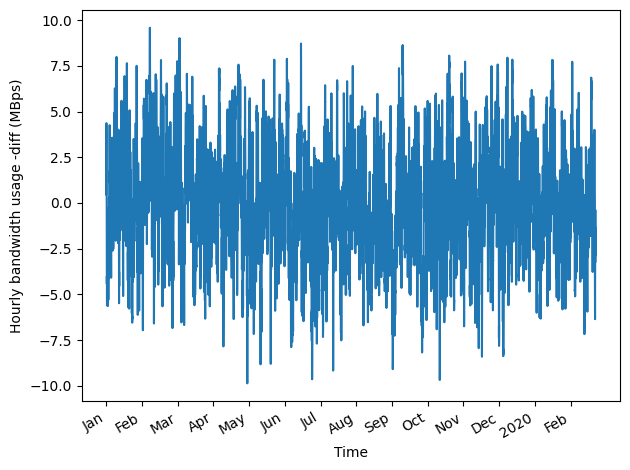

In [20]:
fig, ax = plt.subplots()

ax.plot(bandwidth_diff)
ax.set_xlabel("Time")
ax.set_ylabel("Hourly bandwidth usage -diff (MBps)")

plt.xticks(
    np.arange(0, 10000, 730),
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb']
)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig(path+"ts8.png")

In [21]:
ADF_result = adfuller(bandwidth_diff)

print(f"ADF Statistic: {ADF_result[0]}")
print(f"p-value: {ADF_result[1]}")

ADF Statistic: -20.694853863789017
p-value: 0.0


In [22]:
df_diff = pd.DataFrame({"bandwidth_diff": bandwidth_diff})

train = df_diff[:-168]
test = df_diff[-168:]

print(len(train))
print(len(test))

9831
168


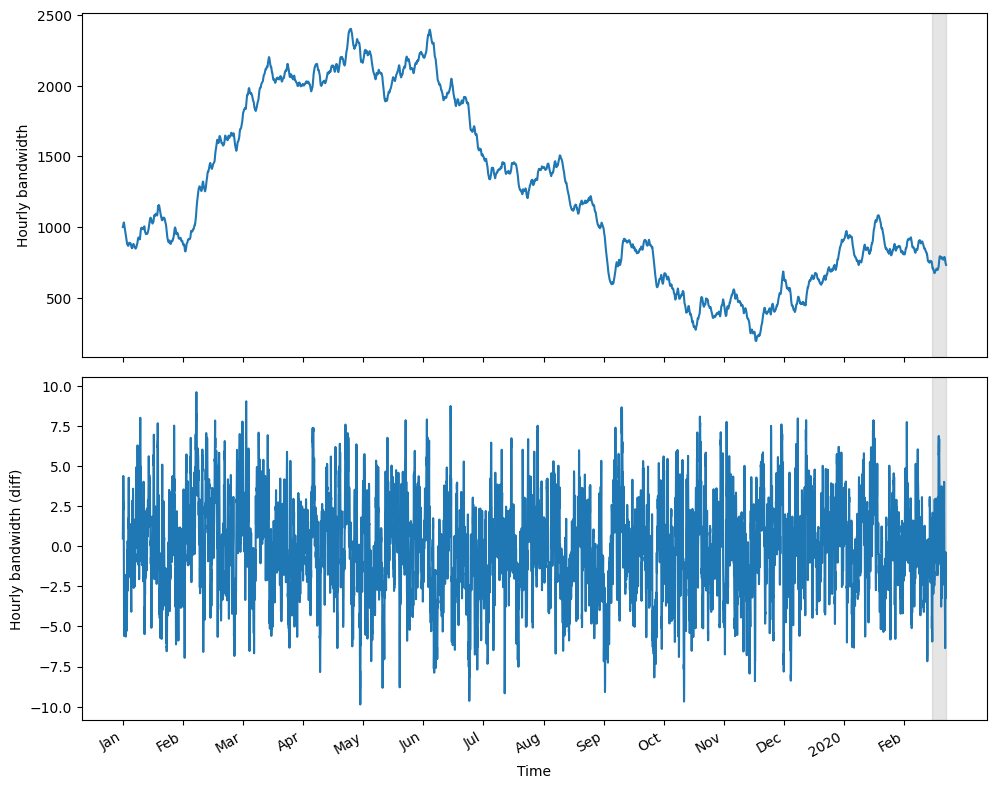

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 8))

ax1.plot(df.hourly_bandwidth)
ax1.set_xlabel("Time")
ax1.set_ylabel("Hourly bandwidth")
ax1.axvspan(9830, 9999, color="grey", alpha=0.2)

ax2.plot(df_diff.bandwidth_diff)
ax2.set_xlabel("Time")
ax2.set_ylabel("Hourly bandwidth (diff)")
ax2.axvspan(9830, 9999, color="grey", alpha=0.2)

plt.xticks(
    np.arange(0, 10000, 730),
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb']
)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig(path+"ts9.png")

In [24]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)

order_list = list(product(ps, qs))
order_list


[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3)]

In [25]:
result_df = optimize_ARMA(train["bandwidth_diff"], order_list)
result_df

<ipython-input-8-a4886050f208>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['simple_differncing']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['simple_differncing']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['simple_differncing']).Passing unknown keyword argumen

,"(p,q)",AIC
0,"(3, 2)",27991.063879
1,"(2, 3)",27991.287509
2,"(2, 2)",27991.603598
3,"(3, 3)",27993.416924
4,"(1, 3)",28003.349550
5,"(1, 2)",28051.351401
6,"(3, 1)",28071.155496
7,"(3, 0)",28095.618186
8,"(2, 1)",28097.250766
9,"(2, 0)",28098.407664


* ARMA(2,2) model is the model that should be selected. Its AIC value is very close to the ARMA(3,2) and ARMA(2,3) models, while being less complex, since it has four parameters to be estimated instead of five.

In [26]:
model = SARIMAX(train["bandwidth_diff"], order=(2, 0, 2), simple_differencing=False)
model.fit = model.fit(disp=False)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1397.704
Date:                Tue, 11 Mar 2025   AIC                           2801.408
Time:                        12:24:17   BIC                           2816.131
Sample:                             0   HQIC                          2807.004
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3103      0.032      9.572      0.000       0.247       0.374
ma.L1          0.9203      0.014     66.415      0.000       0.893       0.948
sigma2         0.9560      0.042     22.825      0.0

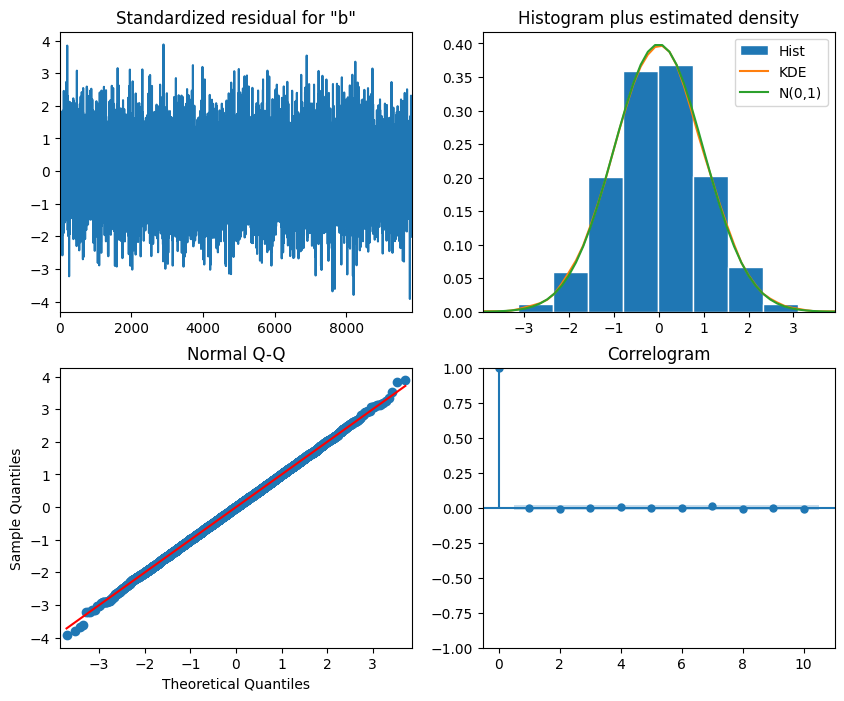

In [27]:
model.fit.plot_diagnostics(figsize=(10, 8))
plt.savefig(path+"ts10.png")

In [28]:
residuals = model_fit.resid

lb_df = acorr_ljungbox(residuals, np.arange(1, 11, 1))

lb_df

,lb_stat,lb_pvalue
1,0.030706,0.860897
2,0.528021,0.767966
3,0.540904,0.909817
4,2.079774,0.721089
5,2.271897,0.810385
6,2.896262,0.821750
7,2.900378,0.894063
8,4.418799,0.817501
9,4.787567,0.852419
10,5.246805,0.874093


In [30]:
def rolling_forecast(df: pd.DataFrame, train_len:int, horizon:int, window:int, method:str) -> list:
    total_len = train_len + horizon
    end_idx = train_len

    if method == "mean":
        pred_mean = []

        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))

        return pred_mean

    elif method == "last":
        pred_last_value = []

        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))

        return pred_last_value

    elif method == "ARMA":
        pred_ARMA = []

        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(2,0,2))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oss_pred = predictions.predicted_mean.iloc[-window:]
            pred_ARMA.extend(oss_pred)

        return pred_ARMA


In [32]:
pred_df = test.copy()

TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 2

pred_mean = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, "mean")
pred_last_value = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, "last")
pred_ARMA = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, "ARMA")

test.loc[:, "pred_mean"] = pred_mean
test.loc[:, "pred_last_value"] = pred_last_value
test.loc[:, "pred_ARMA"] = pred_ARMA

pred_df.head()

<ipython-input-32-3082c727b9ae>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, "pred_mean"] = pred_mean
<ipython-input-32-3082c727b9ae>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, "pred_last_value"] = pred_last_value
<ipython-input-32-3082c727b9ae>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,bandwidth_diff
9831,-5.943995
9832,-5.865194
9833,-3.197066
9834,-1.090197
9835,0.665291


In [33]:
test.head()

,bandwidth_diff,pred_mean,pred_last_value,pred_ARMA
9831,-5.943995,-0.028214,-5.791207,-5.460661
9832,-5.865194,-0.028214,-5.791207,-4.890626
9833,-3.197066,-0.029410,-5.865194,-5.335905
9834,-1.090197,-0.029410,-5.865194,-4.751731
9835,0.665291,-0.029840,-1.090197,-0.375596


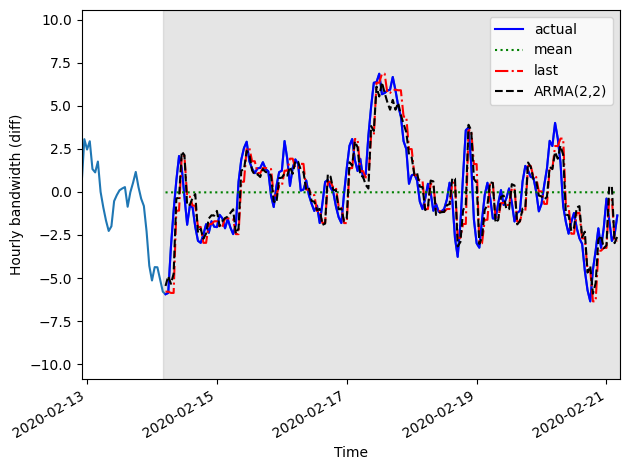

In [35]:
fig, ax = plt.subplots()

ax.plot(df_diff["bandwidth_diff"])
ax.plot(test["bandwidth_diff"], "b-", label="actual")
ax.plot(test["pred_mean"], "g:", label="mean")
ax.plot(test["pred_last_value"], "r-.", label="last")
ax.plot(test["pred_ARMA"], "k--", label="ARMA(2,2)")
ax.legend(loc="best")
ax.set_xlabel("Time")
ax.set_ylabel("Hourly bandwidth (diff)")

ax.axvspan(9830, 9999, color="grey", alpha=0.2)

ax.set_xlim(9800, 9999)

plt.xticks(
    [9802, 9850, 9898, 9946, 9994],
    ["2020-02-13", "2020-02-15",  "2020-02-17", "2020-02-19", "2020-02-21"]
)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig(path+"ts11.png")

In [36]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(test["bandwidth_diff"], test["pred_mean"])
mse_last = mean_squared_error(test["bandwidth_diff"], test["pred_last_value"])
mse_ARMA = mean_squared_error(test["bandwidth_diff"], test["pred_ARMA"])

print(mse_mean, mse_last, mse_ARMA)

6.306526957989325 2.2297582947733656 1.7690462114420604


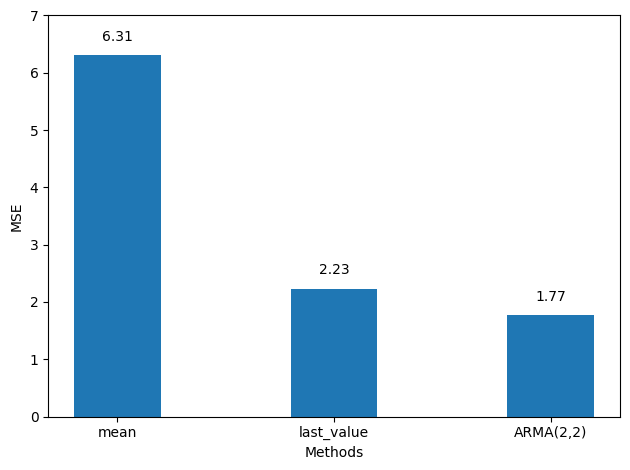

In [39]:
fig, ax = plt.subplots()

x = ["mean", "last_value", "ARMA(2,2)"]
y = [mse_mean, mse_last, mse_ARMA]

ax.bar(x, y, width=0.4)
ax.set_xlabel("Methods")
ax.set_ylabel("MSE")
ax.set_ylim(0, 7)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.25, s=str(round(value, 2)), ha="center")

plt.tight_layout()

plt.savefig(path+"ts12.png")

In [40]:
df["pred_bandwidth"] = pd.Series()
df["pred_bandwidth"][9832:] = df["hourly_bandwidth"].iloc[9832] + test["pred_ARMA"].cumsum()

<ipython-input-40-9552f3db3e77>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["pred_bandwidth"][9832:] = df["hourly_bandwidth"].iloc[9832] + test["pred_ARMA"].cumsum()
<ipython-input-40-9552f3db3e77>:2: SettingWithCopyWarning: 
A value

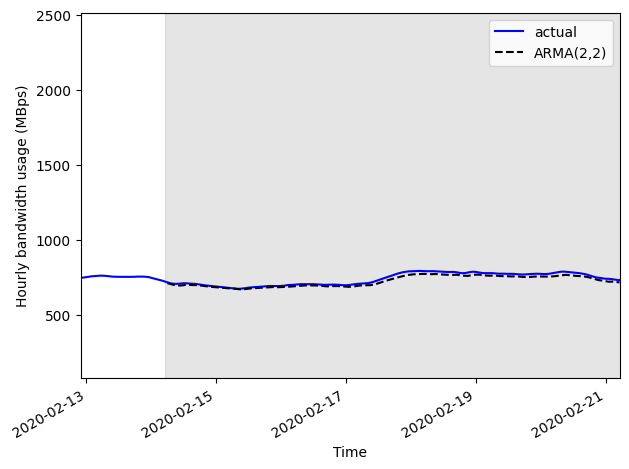

In [42]:
fig, ax = plt.subplots()

ax.plot(df["hourly_bandwidth"], "b-", label="actual")
ax.plot(df["pred_bandwidth"], "k--", label="ARMA(2,2)")

ax.legend(loc="best")

ax.set_xlabel("Time")
ax.set_ylabel("Hourly bandwidth usage (MBps)")

ax.axvspan(9831, 10000, color="grey", alpha=0.2)
ax.set_xlim(9800, 9999)

plt.xticks(
    [9802, 9850, 9898, 9946, 9994],
    ['2020-02-13', '2020-02-15', '2020-02-17', '2020-02-19', '2020-02-21']
)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig(path+"ts13.png")


In [43]:
from sklearn.metrics import mean_absolute_error

mae_ARMA_undiff = mean_absolute_error(df["hourly_bandwidth"][9832:], df["pred_bandwidth"][9832:])

print(mae_ARMA_undiff)

14.000362773294084


*  forecasts are 14 Mbps above or below the actual bandwidth usage